#### Introduction
Large language models (LLMs) have demonstrated remarkable capabilities across many language tasks, even ones challenging for native speakers, such as translation. However, to properly assess these models' abilities, we need standardized evaluation methods.

While basic language competency - producing coherent, grammatically correct text across languages - has largely been mastered by state-of-the-art LLMs, more nuanced aspects of language understanding remain challenging. One such frontier is the comprehension of metaphorical expressions, idioms, and figures of speech.

Consider the Danish expression "*at stille træskoene*". Literally, it means "to put away one's wooden shoes". But if you are a Danish speaker, you will likely know that it actually means "to die". Its meaning corresponds to English idioms like "*to kick the bucket*" or even "*bite the dust*." Understanding such expressions requires not just language fluency but also cultural knowledge, which makes translating and understanding these types of expressiosn ideal for evaluating a LLM's deeper language comprehension.

This unseen, but measureable, cultural dimension raises interesting questions about LLMs developed primarily by US-based companies. How well do they handle non-English metaphorical expressions? To address this, the Danish Language and Literature Society (DSL), in collaboration with the Danish Agency for Digital Government, has created the *talemaader*-dataset - a collection of 1,000 Danish metaphorical expressions designed to evaluate models through multiple-choice questions. The dataset, available under a CC-BY-4.0 license, can be accessed through sprogteknologi.dk.

This project is an evaluation of six different LLMs's on the *talemaader*-dataset. Specifically, the models are GPT-3.5, GPT-4, GPT-4o, Claude, Gemini, and Llama and are created and maintained by OpenAI, Anthropic, Google, and Meta.

OpenAI's GPT-3 from 2020 and its improved version GPT-3.5 from 2023 are used as a baselines since they are the smallest and oldest LLMs. But, as you will see below, even though they are "old" LLMs (at least in the rapidly evolving field of machine learning), they are defintely not incapable, and the results may surprise!

Let's have a look!

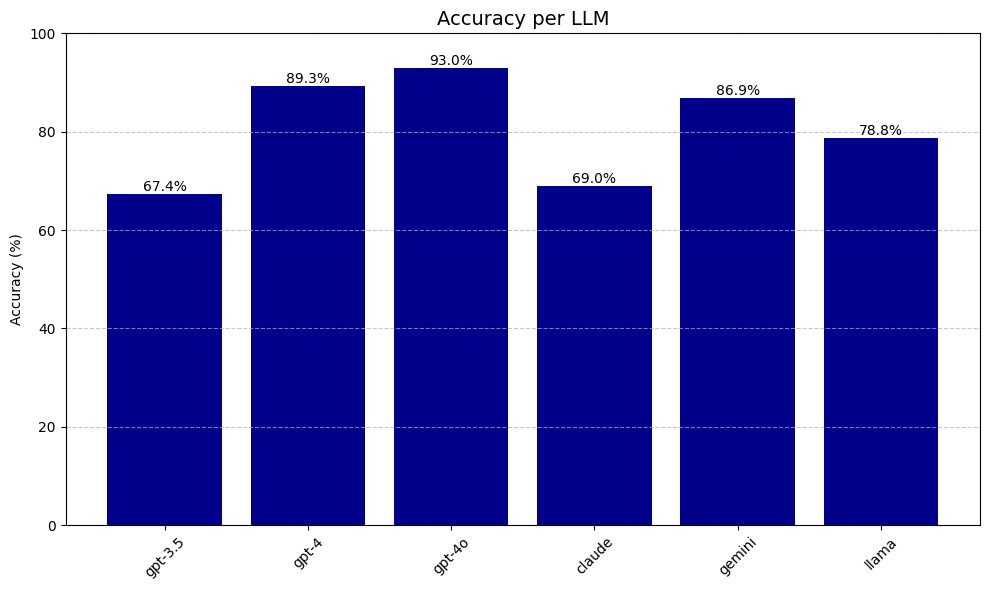

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import os

root_dir = Path(os.getcwd()).parent

llm_order = ['gpt-3.5', 'gpt-4', 'gpt-4o', 'claude', 'gemini', 'llama']

accuracies = []
for llm in llm_order:
    file_path = root_dir / 'data' / 'processed' / f'only_discrepancies_{llm}.csv'
    df = pd.read_csv(file_path)
    n_discrepancies = len(df)
    accuracy = (1000 - n_discrepancies) / 1000  # Calculate accuracy
    accuracies.append(accuracy * 100)  # Convert to percentage

plt.figure(figsize=(10, 6))
bars = plt.bar(llm_order, accuracies, color='darkblue')

plt.title('Accuracy per LLM', fontsize=14)
plt.ylabel('Accuracy (%)')
plt.xticks(rotation=45)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%',
             ha='center', va='bottom')

plt.ylim(0, 100)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#### Accuracy
The above histogram shows the accuracy scores for the six different LLMs when faced with the task of predicting the correct definition of Danish idioms from the *talemaader*-dataset. 

GPT-4o achieved the highest accuracy at 93.0%, which means it correctly guessed the definition of 930 out of 1000 Danish idioms! I don't know about you, but I think that is a remarkable achievement and one that I doubt could even be achieved by the average Danish native speaker.  

Following the GPT-4o model, GPT-4 achieves 89.3% accuracy and Gemini 86.9%. 

Llama and GPT-3.5 performed notably lower, at 78.8% and 67.4% respectively. Surprisingly, Claude showed relatively low performance at 69.0%, placing it second-to-last among the tested models. This is surprising because, at the time of writing, Claude Sonnet 3.5 is a leading LLM on a few benchmarks and tasks, such as coding (though this looks to change with the launch of OpenAI's o1 model).

Perhaps unsurprisingly, the accuracy of OpenAI's GPT models improves as the LLMs get progressively bigger and better. 

#### Examples and error analysis
So, how is the analysis actually performed and is there any "rhyme and reason" (hah! that's an expression for you!) to the types of misinterpretations the LLMs generally make? That's what we will look at in the section below.

First, consider the expression "grus i maskineriet". If you are a Danish speaker, try to decide which of the four options is the correct answer.

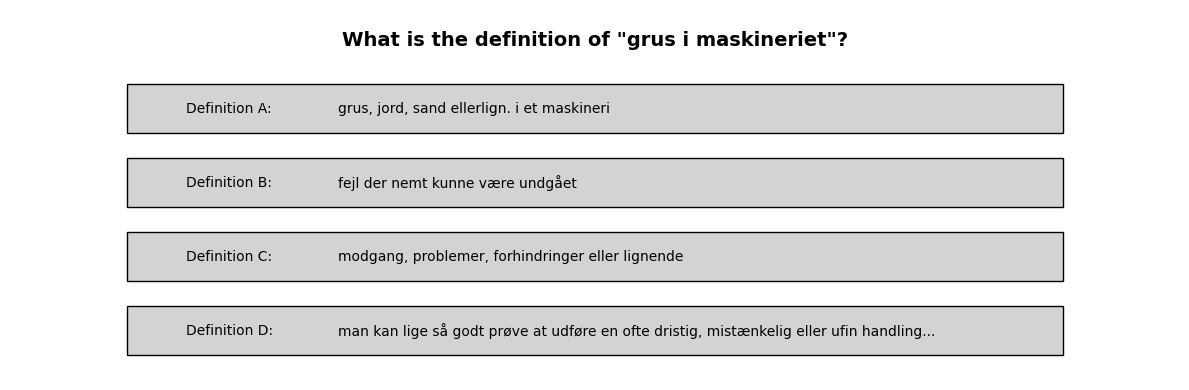

In [20]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(12, 4))
ax.set_xlim(0, 10)
ax.set_ylim(0, 6)

plt.text(5, 5.5, 'What is the definition of "grus i maskineriet"?', ha='center', va='center', fontsize=14, fontweight='bold')

options = {
   'A': 'grus, jord, sand ellerlign. i et maskineri',
   'B': 'fejl der nemt kunne være undgået',
   'C': 'modgang, problemer, forhindringer eller lignende', 
   'D': 'man kan lige så godt prøve at udføre en ofte dristig, mistænkelig eller ufin handling...'
}

y_pos = 4
for key, text in options.items():
   rect = patches.Rectangle((1, y_pos), 8, 0.8, facecolor='lightgray', edgecolor='black')
   ax.add_patch(rect)
   plt.text(1.5, y_pos+0.4, f'Definition {key}:', va='center')
   plt.text(2.8, y_pos+0.4, text, va='center', wrap=True)
   y_pos -= 1.2

ax.axis('off')
plt.tight_layout()
plt.show()

The answer is of course C, i.e. "modgang, problemer, forhindringer eller lignende".

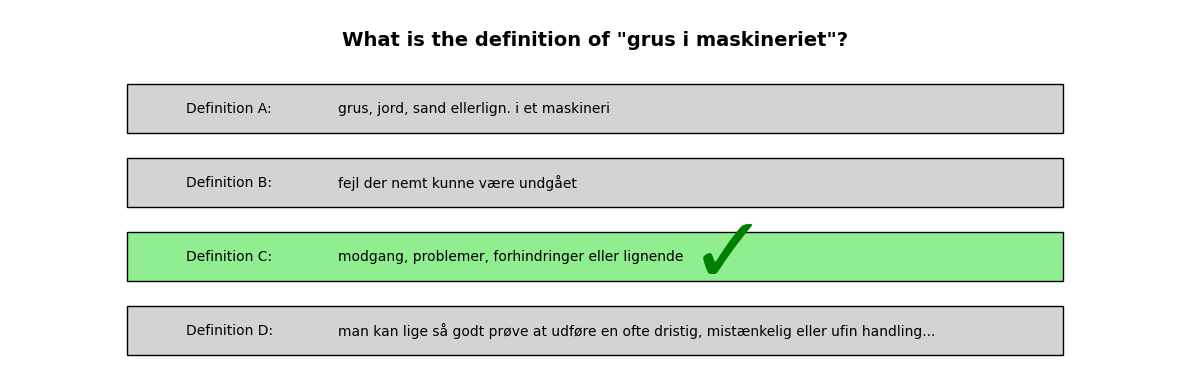

In [31]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(12, 4))
ax.set_xlim(0, 10)
ax.set_ylim(0, 6)

plt.text(5, 5.5, 'What is the definition of "grus i maskineriet"?', ha='center', va='center', fontsize=14, fontweight='bold')

options = {
   'A': ('grus, jord, sand ellerlign. i et maskineri', 'lightgray'),
   'B': ('fejl der nemt kunne være undgået', 'lightgray'),
   'C': ('modgang, problemer, forhindringer eller lignende', 'lightgreen'),
   'D': ('man kan lige så godt prøve at udføre en ofte dristig, mistænkelig eller ufin handling...', 'lightgray')
}

y_pos = 4
for key, (text, color) in options.items():
   rect = patches.Rectangle((1, y_pos), 8, 0.8, facecolor=color, edgecolor='black')
   ax.add_patch(rect)
   plt.text(1.5, y_pos+0.4, f'Definition {key}:', va='center')
   plt.text(2.8, y_pos+0.4, text, va='center', wrap=True)
   
   if key == 'C':
       plt.text(5.8, y_pos+0.4, '✓', color='green', fontsize=68, va='center')
       
   y_pos -= 1.2

ax.axis('off')
plt.tight_layout()
plt.show()

The task you just performed is exactly the same task we asked the LLMs to perform, but we asked the LLM to perform the task *programmatically* and the code is part of this repository, if you want to have a look.

Since we have the correct answer stored (but it is not shown to the LLM), we can take the LLM's predicted definition and compare it to the true definition. And when the LLM has gone through all expressions in the *talemaader-*dataset, we can count the number of correct predictions as well as wrong guesses - and the score is the metric we use to evaluate how good, or bad, the LLM is at proficiently understanding idioms.

When reading the example above, you may have quickly wondered if Definition B was correct - and this was actually on purpose to try to trick you and the LLM. The *talemaader*-dataset has been designed and specially curated to include one correct definition and three wrong definitions in the categories (1) a concrete misinterpretation, (2) an abstract misinterpretation, and (3) a randomly selected definition from another idiom.

In the above example, Definition A is a concrete misinterpretation and if you were a stupid LLM that took things literally, this might have been your choice of answer. Definition B is an abstract misinterpretation; it is in a sense related to the true definition. Definition D is the definition of another expression, i.e. the Danish expression 'går den, så går den'. 

The purpose of the three types of false definitions, each incorrect in its own way, is firstly to make the test set more challenging because some definitions sound plausible but do not correspond to the idiom's usage. Secondly, it facilitates a more in-depth and nuanced analysis of the LLM's responses to the task as we are able to see, if the model chose wrong, what category it chose instead..

Let's do exactly that! Let's take a look at the types of misinterpretations the LLMs perform.

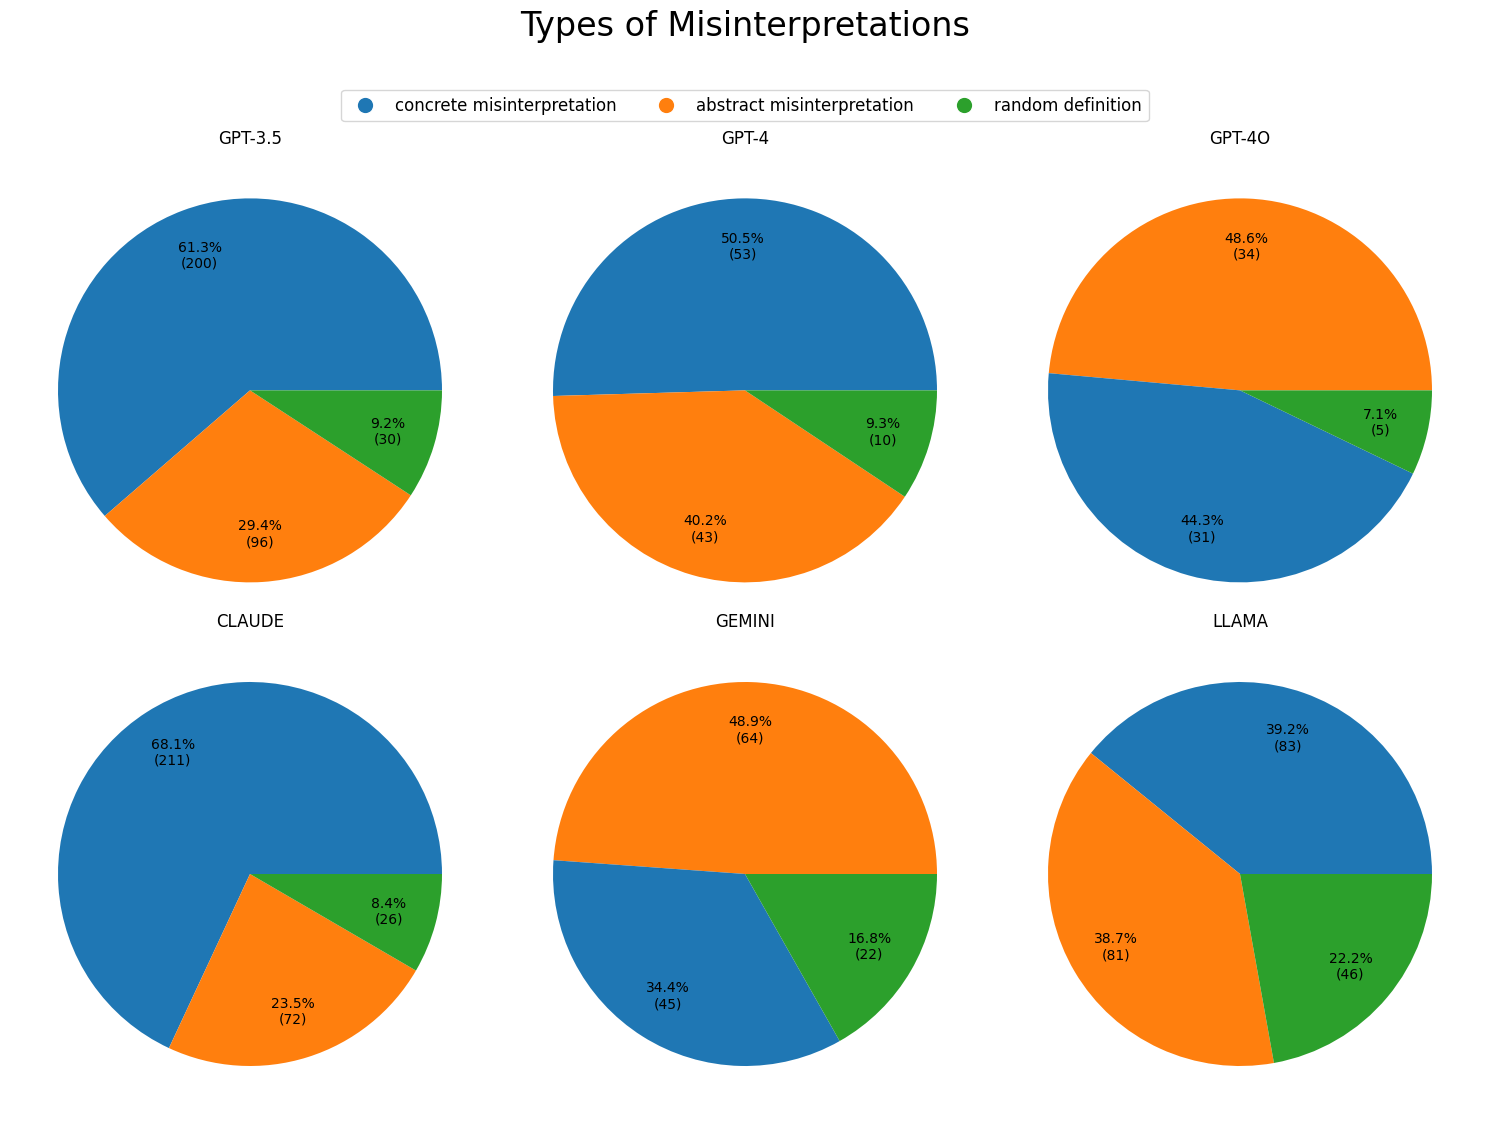

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import os

root_dir = Path(os.getcwd()).parent

fig = plt.figure(figsize=(15, 12))

colors = {
   'concrete misinterpretation': '#1f77b4',  # blue
   'abstract misinterpretation': '#ff7f0e',  # orange
   'random definition': '#2ca02c'            # green
}

plt.suptitle('Types of Misinterpretations', fontsize=24, y=0.95)  

legend_elements = [plt.Line2D([0], [0], marker='o', color='w', 
                           markerfacecolor=color, markersize=12, label=label)
                 for label, color in colors.items()]
fig.legend(handles=legend_elements, loc='upper center', 
         bbox_to_anchor=(0.5, 0.89), ncol=3, fontsize=12)

llm_order = ['gpt-3.5', 'gpt-4', 'gpt-4o', 'claude', 'gemini', 'llama']

for idx, llm in enumerate(llm_order, 1):
   file_path = root_dir / 'results' / 'predictions' / f'misinterpretations_{llm}.csv'
   
   df = pd.read_csv(file_path)
   
   counts = df['misinterpretation_type'].value_counts()
   
   ax = plt.subplot(2, 3, idx)
   
   plt.pie(counts.values, 
           colors=[colors[key] for key in counts.index],
           autopct=lambda pct: f'{pct:.1f}%\n({int(pct/100.*sum(counts.values)):d})',
           labels=[''] * len(counts),
           pctdistance=0.75,  # Move percentage labels more toward center
           textprops={'ha': 'center', 'va': 'center'})  # Center align text
   
   display_name = 'GPT-3.5' if llm == 'gpt-3.5' else llm.upper()
   ax.set_title(display_name, pad=5, fontsize=12)

plt.tight_layout()
plt.subplots_adjust(top=0.85)  
plt.show()

As we can see in the charts above, there is a prevalence for the models to predict either a wrong concrete or abstract definition - and not so much choosing the random prediction, as we learned above, is completely wrong where concrete and abstract misinterpretations are, to some degree, related to the idiom.

I would argue that even though they do not correctly predict the label, the prevalence of the LLMS to pick a concrete or abstract definition of the expression instead of random definition (random definitions is picked under 10% of the time by 4/6 of the models) is a sign of some sort language competency and understanding - even though it does not correctly predict the label.


#### Prompt tweaking
### One-shot prompting - shooting yourself in the foot?
The amount of wrong predictions rose from 327=>347 when introdced one-shot prompting (from previous zero-shot) for GPT-3. I only introduced the second part of the below prompt, but this introduced more errors. So, giving the GPT-3 model an example actually made it worse at predicting the correct label. My immediate guess as to why is that since the meaning in metaphorical expressions is indirect, by adding this second part of the prompt, it introduced a flair of context to the response - and not just described the process, which was the goal - thereby introducing some noise to the model's predictions.

    PROMPT_TEMPLATE = """Choose the correct definition for the given metaphorical expression by responding with only a single letter representing your choice (A, B, C, or D).
    Sentence: {metaphorical_expression}
    Option A: {definition_a}
    Option B: {definition_b}
    Option C: {definition_c}
    Option D: {definition_d}
    Your response should be exactly one letter: A, B, C, or D."""

        

### Ablation
 removed 'metaphorical' from GPT-4o and wrong predictions only went from 70 => 72